서울 지하철 유/무임 승차데이터

T-money 제공

#### 문제1. 유임 승차 비율이 가장 높은 역은 어디일까

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('subwayfee.csv', encoding='cp949')
df.shape

(597, 9)

In [43]:
df = df.replace(',','',regex=True)
df = df.dropna() # 누락값이 있는 행은 버린다

In [44]:
df.head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2019-05,1호선,150,서울역,1568570,1489737,247801,242107,2019-06-03 10:56:20


In [45]:
arr = np.array(df) # 배열로 변환
arr.shape, arr[0]

((597, 9), array(['2019-05', '1호선', 150, '서울역', '1568570', '1489737', '247801',
        '242107', '2019-06-03 10:56:20'], dtype=object))

유임승차 인원이 가장 많은 곳은?

In [46]:
유임승차 = (arr[:, 4 ]).astype(np.int)
arr[np.argmax(유임승차),1:4:2], np.argmax(유임승차), np.argmax(유임승차)

(array(['2호선', '강남'], dtype=object), 31, 31)

In [48]:
무임승차 = (arr[:,6]).astype(np.int)
유임승차비율 = 유임승차/(무임승차+1)
arr[np.argmax(유임승차비율), 1:4:2], np.max(유임승차비율), np.argmax(유임승차비율)

(array(['분당선', '복정'], dtype=object), 24.0, 237)

유무임 승하차 인원이 가장 많은 역은 어디일까

In [57]:
전체승하차인원 = arr[:, 4:8].astype(np.int)
역이용인원 = np.sum(전체승하차인원, axis=1)
arr[np.argmax(역이용인원), 1:4:2], np.max(역이용인원), np.argmax(역이용인원)

(array(['2호선', '강남'], dtype=object), 6234453, 31)

모든 역의 유무임 승하차 비율은 어떻게 될까 > 파이 그래프 (유임승차 45%, 무음하차 x%)

[유임승차인원: x, 유임하차인원:x, 무임승차:x, 무임하차 : x]

In [62]:
df.columns

Index(['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차', '작업일시'], dtype='object')

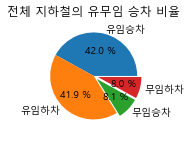

In [73]:
a = np.sum(arr[:, 4:8].astype(np.int),axis=0)
plt.figure(figsize=(2,2))
plt.rc('font', family='Malgun Gothic')
n = plt.pie(a, labels=df.columns[4:8], autopct='%.1f %%', explode=(0,0,0.1,0.1))
plt.title('전체 지하철의 유무임 승차 비율')
plt.savefig('all_subway_ratio.png')

모든 역마다 유무임 승차비율을 따로 파이 차트로 나타내기(50만명 이상 승차하는 곳만)

In [81]:
for i in range(len(arr)):
    row = arr[i]
    승하차인원 = row[4:8].astype(np.int)
    유임승차 = 승하차인원[0]
    if 유임승차 > 1500000:
        print(row)
        n = plt.pie(승하차인원, labels=df.columns[4:8], autopct='%.1f %%', explode=(0,0,0.1,0.1))
        역이름 = row[3]
        파일명 = 'subway'+ 역이름 + '.png'
        plt.title(역이름 +'역의 유무임 승차 비율')
        plt.savefig(파일명)
        plt.close()

['2019-05' '1호선' 150 '서울역' '1568570' '1489737' '247801' '242107'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 216 '잠실(송파구청)' '2539574' '2462479' '233044' '219947'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 219 '삼성(무역센터)' '1781824' '1842623' '134802' '127716'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 222 '강남' '2894341' '2974378' '192979' '172755'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 228 '서울대입구(관악구청)' '1509438' '1455697' '222610' '213945'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 230 '신림' '1996054' '1926203' '266618' '270264'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 232 '구로디지털단지' '1810723' '1808076' '194678' '197938'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 234 '신도림' '1646558' '1650521' '234895' '223466'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 239 '홍대입구' '2477631' '2672677' '122634' '119350'
 '2019-06-03 10:56:20']
['2019-05' '3호선' 329 '고속터미널' '1776023' '1683057' '210770' '201605'
 '2019-06-03 10:56:20']
